# **Fetching Data from an API**
Fetching data from APIs using Python involves utilizing the requests library to make HTTP requests to a remote server and retrieve data. APIs (Application Programming Interfaces) provide a standardized way for different software applications to communicate and exchange information. 

## **Import Required Libraries**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## **Setup the API**

In [2]:
url = "https://air-quality.p.rapidapi.com/history/airquality"

querystring = {"lon":"87.0624","lat":"23.1645"}

headers = {
	"X-RapidAPI-Key": "YOUR_API_KEY",
	"X-RapidAPI-Host": "air-quality.p.rapidapi.com"
}

## **Send the Request**

In [3]:
response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'city_name': 'Bānkura', 'country_code': 'IN', 'data': [{'aqi': 123, 'co': 333, 'datetime': '2023-08-27:14', 'no2': 16, 'o3': 66.7, 'pm10': 76, 'pm25': 44, 'so2': 48.3, 'timestamp_local': '2023-08-27T19:30:00', 'timestamp_utc': '2023-08-27T14:00:00', 'ts': 1693144800}, {'aqi': 112, 'co': 258, 'datetime': '2023-08-27:13', 'no2': 12, 'o3': 83.3, 'pm10': 71, 'pm25': 40, 'so2': 46.7, 'timestamp_local': '2023-08-27T18:30:00', 'timestamp_utc': '2023-08-27T13:00:00', 'ts': 1693141200}, {'aqi': 102, 'co': 183, 'datetime': '2023-08-27:12', 'no2': 8, 'o3': 100, 'pm10': 66, 'pm25': 36, 'so2': 45, 'timestamp_local': '2023-08-27T17:30:00', 'timestamp_utc': '2023-08-27T12:00:00', 'ts': 1693137600}, {'aqi': 100, 'co': 164.7, 'datetime': '2023-08-27:11', 'no2': 6, 'o3': 110.7, 'pm10': 69, 'pm25': 35, 'so2': 48, 'timestamp_local': '2023-08-27T16:30:00', 'timestamp_utc': '2023-08-27T11:00:00', 'ts': 1693134000}, {'aqi': 98, 'co': 146.3, 'datetime': '2023-08-27:10', 'no2': 4, 'o3': 121.3, 'pm10': 72, 'pm

## **Convert JSON into Dataframe**

In [4]:
# Converting json into dataframe
df = pd.DataFrame(response.json()["data"])

In [5]:
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,123,333.0,2023-08-27:14,16.0,66.7,76.0,44.0,48.3,2023-08-27T19:30:00,2023-08-27T14:00:00,1693144800
1,112,258.0,2023-08-27:13,12.0,83.3,71.0,40.0,46.7,2023-08-27T18:30:00,2023-08-27T13:00:00,1693141200
2,102,183.0,2023-08-27:12,8.0,100.0,66.0,36.0,45.0,2023-08-27T17:30:00,2023-08-27T12:00:00,1693137600
3,100,164.7,2023-08-27:11,6.0,110.7,69.0,35.0,48.0,2023-08-27T16:30:00,2023-08-27T11:00:00,1693134000
4,98,146.3,2023-08-27:10,4.0,121.3,72.0,34.0,51.0,2023-08-27T15:30:00,2023-08-27T10:00:00,1693130400


In [6]:
df.shape

(72, 11)

## **Preparing the Data**

In [7]:
# Extracting only required columns
required_columns = ["timestamp_local", "aqi", "no2", "so2", "o3", "co", "pm10", "pm25"]
weather_data = df[required_columns]

In [8]:
weather_data.head()

,timestamp_local,aqi,no2,so2,o3,co,pm10,pm25
0,2023-08-27T19:30:00,123,16.0,48.3,66.7,333.0,76.0,44.0
1,2023-08-27T18:30:00,112,12.0,46.7,83.3,258.0,71.0,40.0
2,2023-08-27T17:30:00,102,8.0,45.0,100.0,183.0,66.0,36.0
3,2023-08-27T16:30:00,100,6.0,48.0,110.7,164.7,69.0,35.0
4,2023-08-27T15:30:00,98,4.0,51.0,121.3,146.3,72.0,34.0


In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  72 non-null     object 
 1   aqi              72 non-null     int64  
 2   no2              72 non-null     float64
 3   so2              72 non-null     float64
 4   o3               72 non-null     float64
 5   co               72 non-null     float64
 6   pm10             72 non-null     float64
 7   pm25             72 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.6+ KB


In [10]:
# Converting 'timestamp_local' column into datetime object
weather_data["timestamp_local"] = pd.to_datetime(weather_data["timestamp_local"])

In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  72 non-null     datetime64[ns]
 1   aqi              72 non-null     int64         
 2   no2              72 non-null     float64       
 3   so2              72 non-null     float64       
 4   o3               72 non-null     float64       
 5   co               72 non-null     float64       
 6   pm10             72 non-null     float64       
 7   pm25             72 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 4.6 KB


In [12]:
# Sorting the data by timestamp
weather_data.sort_values(by="timestamp_local", inplace=True)

In [13]:
# Set the 'timestamp_local' as index
weather_data.set_index("timestamp_local", inplace=True)
weather_data.head()

,aqi,no2,so2,o3,co,pm10,pm25
timestamp_local,,,,,,,
2023-08-24 20:30:00,82,9.0,51.0,63.0,239.0,38.0,27.0
2023-08-24 21:30:00,80,8.7,52.3,60.0,234.7,36.7,26.0
2023-08-24 22:30:00,78,8.3,53.7,57.0,230.3,35.3,25.0
2023-08-24 23:30:00,76,8.0,55.0,54.0,226.0,34.0,24.0
2023-08-25 00:30:00,74,8.0,60.0,51.0,223.0,32.7,23.0


In [14]:
weather_data.shape

(72, 7)

## **Plot the Data**

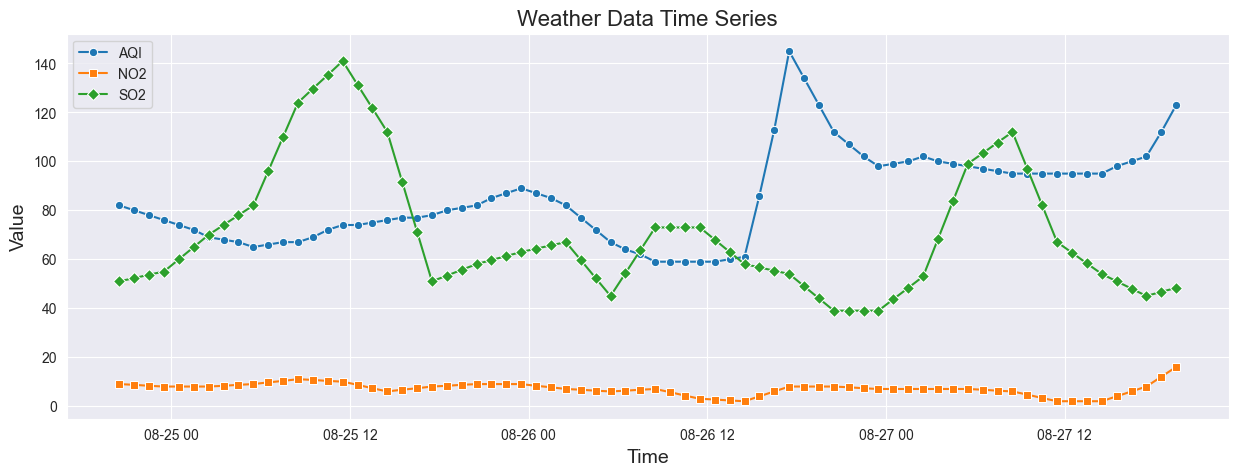

In [15]:
# Plot a line graph
plt.figure(figsize=(15, 5))
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.aqi,
             marker="o", label="AQI")
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.no2, 
             marker="s", label="NO2")
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.so2, 
             marker="D", label="SO2")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("Weather Data Time Series", fontsize=16)
plt.show()

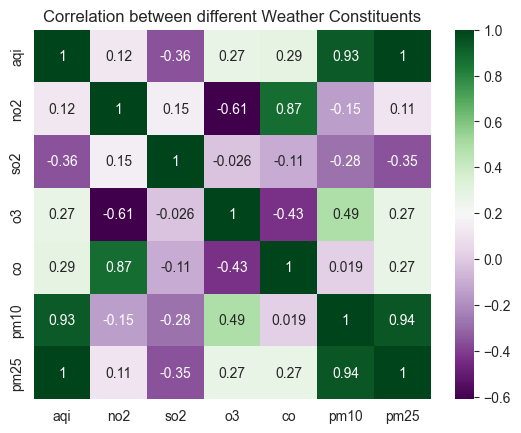

In [16]:
# Plot a heatmap based on correlation of weather constituents
sns.heatmap(weather_data.corr(), annot=True, cmap="PRGn")
plt.title("Correlation between different Weather Constituents", weight="500")
plt.show()

## **Save the Dataframe as CSV**

In [17]:
output_path = r"D:\Coding\Datasets\bankura_one_day_weather.csv"
weather_data.to_csv(output_path)